In [1]:
import os
import pandas as pd
pd.options.display.max_colwidth = 160

from time import time
import matplotlib.pyplot as plt

from nltk import sent_tokenize

import features as util
from features import language_tool_python
from preprocessing import tokenize, impute_missing
from raw_utils import save_to_csv

### Read Data

In [2]:
# Path
cwd = os.getcwd()
csv_path = os.path.join(cwd, 'data/csv/')

train_text = ['train_balanced_text.csv', 'train_imbalanced_text.csv']
test_text = ['test_balanced_text.csv', 'test_imbalanced_text.csv']

#### Email Text

In [3]:
train_balanced_text = pd.read_csv(os.path.join(csv_path, train_text[0]), index_col=0)
test_balanced_text = pd.read_csv(os.path.join(csv_path, test_text[0]), index_col=0)

In [4]:
train_imbalanced_text = pd.read_csv(os.path.join(csv_path, train_text[1]), index_col=0)
test_imbalanced_text = pd.read_csv(os.path.join(csv_path, test_text[1]), index_col=0)

After the preprocessing, the data look like this:

In [5]:
test_balanced_text.head()

,id,body,class
0,2377,please print\n----- Forwarded by Steven J Kean/NA/Enron on 10/16/2000 10:27 AM -----\n\n\tCynthia Sandherr\n\t10/12/2000 07:43 PM\n\t\t \n\t\t To: Thomas E ...,False
1,592,Server Message \n \n\n \n Dear <emailaddress> Our record indicates that you recently made a request to deactivate email And this request will be process...,True
2,1049,Please see the attached articles:,False
3,1087,Please Click Here<urladdress> to Update e-mail Password\n\n\n\nIT Security immediately/\n\n________________________________\nSEED IS PROUD TO BE A 21st CENT...,True
4,725,"Wednesday afternoon Febuary 6th, 2002, the Enron building experienced a brief power outage. The building is powered by one of two Reliant circuits. Yester...",False


#### Email Tokens

Since the .csv files with the already tokenized emails have been subject to further preprocessing like lemmatization and stopword removal, a simple tokenization (at word and sentence level) will also be run here for the purposes of feature extraction.

In [6]:
train_balanced_text['tokens'] = train_balanced_text['body'].apply(tokenize)
test_balanced_text['tokens'] = test_balanced_text['body'].apply(tokenize)
train_imbalanced_text['tokens'] = train_imbalanced_text['body'].apply(tokenize)
test_imbalanced_text['tokens'] = test_imbalanced_text['body'].apply(tokenize)

Note that for the sentence-level tokenization, `nltk.sent_tokenization` is used, so any sentences separated by a newline without punctuation will be considered simply as wrapped text, and not new, different sentences.

In [7]:
train_balanced_text['sentences'] = train_balanced_text['body'].apply(sent_tokenize)
test_balanced_text['sentences'] = test_balanced_text['body'].apply(sent_tokenize)
train_imbalanced_text['sentences'] = train_imbalanced_text['body'].apply(sent_tokenize)
test_imbalanced_text['sentences'] = test_imbalanced_text['body'].apply(sent_tokenize)

# Stylometric Features

Useful markers of whether an email is phishing or not should stem from the writing style of the author.<br>
With this in mind, several features that have been previously used in the literature will be extracted, in order to be compared and combined with the text-only baseline.

In [8]:
train_balanced_style = train_balanced_text[['id', 'class']].copy()
test_balanced_style = test_balanced_text[['id', 'class']].copy()
train_imbalanced_style = train_imbalanced_text[['id', 'class']].copy()
test_imbalanced_style = test_imbalanced_text[['id', 'class']].copy()

### Simple Counts

The simplest kind of features would be simple counts of various parts of the emails, like characters and words.

In [9]:
train_balanced_style['num_chars'] = train_balanced_text['body'].apply(util.count_chars)
train_balanced_style['num_newlines'] = train_balanced_text['body'].apply(util.count_newlines)
train_balanced_style['num_special_chars'] = train_balanced_text['body'].apply(util.count_special_chars)
train_balanced_style['num_words'] = train_balanced_text['tokens'].apply(util.count_words)
train_balanced_style['num_unique_words'] = train_balanced_text['tokens'].apply(util.count_unique_words)
train_balanced_style['sentences'] = train_balanced_text['sentences'].apply(util.count_sentences)
train_balanced_style[['num_sentences', 'num_upper_sentences', 'num_lower_sentences']] = pd.DataFrame(train_balanced_style['sentences'].tolist(), index=train_balanced_style.index)
train_balanced_style = train_balanced_style.drop('sentences', axis=1)

In [10]:
test_balanced_style['num_chars'] = test_balanced_text['body'].apply(util.count_chars)
test_balanced_style['num_newlines'] = test_balanced_text['body'].apply(util.count_newlines)
test_balanced_style['num_special_chars'] = test_balanced_text['body'].apply(util.count_special_chars)
test_balanced_style['num_words'] = test_balanced_text['tokens'].apply(util.count_words)
test_balanced_style['num_unique_words'] = test_balanced_text['tokens'].apply(util.count_unique_words)
test_balanced_style['sentences'] = test_balanced_text['sentences'].apply(util.count_sentences)
test_balanced_style[['num_sentences', 'num_upper_sentences', 'num_lower_sentences']] = pd.DataFrame(test_balanced_style['sentences'].tolist(), index=test_balanced_style.index)
test_balanced_style = test_balanced_style.drop('sentences', axis=1)

In [11]:
train_imbalanced_style['num_chars'] = train_imbalanced_text['body'].apply(util.count_chars)
train_imbalanced_style['num_newlines'] = train_imbalanced_text['body'].apply(util.count_newlines)
train_imbalanced_style['num_special_chars'] = train_imbalanced_text['body'].apply(util.count_special_chars)
train_imbalanced_style['num_words'] = train_imbalanced_text['tokens'].apply(util.count_words)
train_imbalanced_style['num_unique_words'] = train_imbalanced_text['tokens'].apply(util.count_unique_words)
train_imbalanced_style['sentences'] = train_imbalanced_text['sentences'].apply(util.count_sentences)
train_imbalanced_style[['num_sentences', 'num_upper_sentences', 'num_lower_sentences']] = pd.DataFrame(train_imbalanced_style['sentences'].tolist(), index=train_imbalanced_style.index)
train_imbalanced_style = train_imbalanced_style.drop('sentences', axis=1)

In [12]:
test_imbalanced_style['num_chars'] = test_imbalanced_text['body'].apply(util.count_chars)
test_imbalanced_style['num_newlines'] = test_imbalanced_text['body'].apply(util.count_newlines)
test_imbalanced_style['num_special_chars'] = test_imbalanced_text['body'].apply(util.count_special_chars)
test_imbalanced_style['num_words'] = test_imbalanced_text['tokens'].apply(util.count_words)
test_imbalanced_style['num_unique_words'] = test_imbalanced_text['tokens'].apply(util.count_unique_words)
test_imbalanced_style['sentences'] = test_imbalanced_text['sentences'].apply(util.count_sentences)
test_imbalanced_style[['num_sentences', 'num_upper_sentences', 'num_lower_sentences']] = pd.DataFrame(test_imbalanced_style['sentences'].tolist(), index=test_imbalanced_style.index)
test_imbalanced_style = test_imbalanced_style.drop('sentences', axis=1)

## Word Size

Another category of features are those that related to the size of words, like the average size and counts or frequencies of smaller or bigger words.

In [13]:
train_balanced_style['avg_word_size'] = train_balanced_text['tokens'].apply(util.average_word_length)
train_balanced_style['small_words'] = train_balanced_text['tokens'].apply(util.small_words)
train_balanced_style[['num_small_words', 'freq_small_words']] = pd.DataFrame(train_balanced_style['small_words'].tolist(), index=train_balanced_style.index)
train_balanced_style['big_words'] = train_balanced_text['tokens'].apply(util.big_words)
train_balanced_style[['num_big_words', 'freq_big_words']] = pd.DataFrame(train_balanced_style['big_words'].tolist(), index=train_balanced_style.index)
train_balanced_style['huge_words'] = train_balanced_text['tokens'].apply(util.huge_words)
train_balanced_style[['num_huge_words', 'freq_huge_words']] = pd.DataFrame(train_balanced_style['huge_words'].tolist(), index=train_balanced_style.index)
train_balanced_style = train_balanced_style.drop(['small_words', 'big_words', 'huge_words'], axis=1)

In [14]:
test_balanced_style['avg_word_size'] = test_balanced_text['tokens'].apply(util.average_word_length)
test_balanced_style['small_words'] = test_balanced_text['tokens'].apply(util.small_words)
test_balanced_style[['num_small_words', 'freq_small_words']] = pd.DataFrame(test_balanced_style['small_words'].tolist(), index=test_balanced_style.index)
test_balanced_style['big_words'] = test_balanced_text['tokens'].apply(util.big_words)
test_balanced_style[['num_big_words', 'freq_big_words']] = pd.DataFrame(test_balanced_style['big_words'].tolist(), index=test_balanced_style.index)
test_balanced_style['huge_words'] = test_balanced_text['tokens'].apply(util.huge_words)
test_balanced_style[['num_huge_words', 'freq_huge_words']] = pd.DataFrame(test_balanced_style['huge_words'].tolist(), index=test_balanced_style.index)
test_balanced_style = test_balanced_style.drop(['small_words', 'big_words', 'huge_words'], axis=1)

In [15]:
train_imbalanced_style['avg_word_size'] = train_imbalanced_text['tokens'].apply(util.average_word_length)
train_imbalanced_style['small_words'] = train_imbalanced_text['tokens'].apply(util.small_words)
train_imbalanced_style[['num_small_words', 'freq_small_words']] = pd.DataFrame(train_imbalanced_style['small_words'].tolist(), index=train_imbalanced_style.index)
train_imbalanced_style['big_words'] = train_imbalanced_text['tokens'].apply(util.big_words)
train_imbalanced_style[['num_big_words', 'freq_big_words']] = pd.DataFrame(train_imbalanced_style['big_words'].tolist(), index=train_imbalanced_style.index)
train_imbalanced_style['huge_words'] = train_imbalanced_text['tokens'].apply(util.huge_words)
train_imbalanced_style[['num_huge_words', 'freq_huge_words']] = pd.DataFrame(train_imbalanced_style['huge_words'].tolist(), index=train_imbalanced_style.index)
train_imbalanced_style = train_imbalanced_style.drop(['small_words', 'big_words', 'huge_words'], axis=1)

In [16]:
test_imbalanced_style['avg_word_size'] = test_imbalanced_text['tokens'].apply(util.average_word_length)
test_imbalanced_style['small_words'] = test_imbalanced_text['tokens'].apply(util.small_words)
test_imbalanced_style[['num_small_words', 'freq_small_words']] = pd.DataFrame(test_imbalanced_style['small_words'].tolist(), index=test_imbalanced_style.index)
test_imbalanced_style['big_words'] = test_imbalanced_text['tokens'].apply(util.big_words)
test_imbalanced_style[['num_big_words', 'freq_big_words']] = pd.DataFrame(test_imbalanced_style['big_words'].tolist(), index=test_imbalanced_style.index)
test_imbalanced_style['huge_words'] = test_imbalanced_text['tokens'].apply(util.huge_words)
test_imbalanced_style[['num_huge_words', 'freq_huge_words']] = pd.DataFrame(test_imbalanced_style['huge_words'].tolist(), index=test_imbalanced_style.index)
test_imbalanced_style = test_imbalanced_style.drop(['small_words', 'big_words', 'huge_words'], axis=1)

## Sentence Size

Another set of features could be related to various simple statistics about the size of a sentence, using both characters and words as a unit of size.

In [17]:
train_balanced_style['avg_sent_size'] = train_balanced_text['sentences'].apply(util.average_sentence_length)
train_balanced_style[['avg_sentence_chars', 'avg_sentence_words']] = pd.DataFrame(train_balanced_style['avg_sent_size'].tolist(), index=train_balanced_style.index)
train_balanced_style['std_sent_size'] = train_balanced_text['sentences'].apply(util.std_sentence_length)
train_balanced_style[['std_sentence_chars', 'std_sentence_words']] = pd.DataFrame(train_balanced_style['std_sent_size'].tolist(), index=train_balanced_style.index)
train_balanced_style['min_sent_size'] = train_balanced_text['sentences'].apply(util.min_sentence_length)
train_balanced_style[['min_sentence_chars', 'min_sentence_words']] = pd.DataFrame(train_balanced_style['min_sent_size'].tolist(), index=train_balanced_style.index)
train_balanced_style['max_sent_size'] = train_balanced_text['sentences'].apply(util.max_sentence_length)
train_balanced_style[['max_sentence_chars', 'max_sentence_words']] = pd.DataFrame(train_balanced_style['max_sent_size'].tolist(), index=train_balanced_style.index)
train_balanced_style = train_balanced_style.drop(['avg_sent_size', 'std_sent_size', 'min_sent_size', 'max_sent_size'], axis=1)

In [18]:
test_balanced_style['avg_sent_size'] = test_balanced_text['sentences'].apply(util.average_sentence_length)
test_balanced_style[['avg_sentence_chars', 'avg_sentence_words']] = pd.DataFrame(test_balanced_style['avg_sent_size'].tolist(), index=test_balanced_style.index)
test_balanced_style['std_sent_size'] = test_balanced_text['sentences'].apply(util.std_sentence_length)
test_balanced_style[['std_sentence_chars', 'std_sentence_words']] = pd.DataFrame(test_balanced_style['std_sent_size'].tolist(), index=test_balanced_style.index)
test_balanced_style['min_sent_size'] = test_balanced_text['sentences'].apply(util.min_sentence_length)
test_balanced_style[['min_sentence_chars', 'min_sentence_words']] = pd.DataFrame(test_balanced_style['min_sent_size'].tolist(), index=test_balanced_style.index)
test_balanced_style['max_sent_size'] = test_balanced_text['sentences'].apply(util.max_sentence_length)
test_balanced_style[['max_sentence_chars', 'max_sentence_words']] = pd.DataFrame(test_balanced_style['max_sent_size'].tolist(), index=test_balanced_style.index)
test_balanced_style = test_balanced_style.drop(['avg_sent_size', 'std_sent_size', 'min_sent_size', 'max_sent_size'], axis=1)

In [19]:
train_imbalanced_style['avg_sent_size'] = train_imbalanced_text['sentences'].apply(util.average_sentence_length)
train_imbalanced_style[['avg_sentence_chars', 'avg_sentence_words']] = pd.DataFrame(train_imbalanced_style['avg_sent_size'].tolist(), index=train_imbalanced_style.index)
train_imbalanced_style['std_sent_size'] = train_imbalanced_text['sentences'].apply(util.std_sentence_length)
train_imbalanced_style[['std_sentence_chars', 'std_sentence_words']] = pd.DataFrame(train_imbalanced_style['std_sent_size'].tolist(), index=train_imbalanced_style.index)
train_imbalanced_style['min_sent_size'] = train_imbalanced_text['sentences'].apply(util.min_sentence_length)
train_imbalanced_style[['min_sentence_chars', 'min_sentence_words']] = pd.DataFrame(train_imbalanced_style['min_sent_size'].tolist(), index=train_imbalanced_style.index)
train_imbalanced_style['max_sent_size'] = train_imbalanced_text['sentences'].apply(util.max_sentence_length)
train_imbalanced_style[['max_sentence_chars', 'max_sentence_words']] = pd.DataFrame(train_imbalanced_style['max_sent_size'].tolist(), index=train_imbalanced_style.index)
train_imbalanced_style = train_imbalanced_style.drop(['avg_sent_size', 'std_sent_size', 'min_sent_size', 'max_sent_size'], axis=1)

In [20]:
test_imbalanced_style['avg_sent_size'] = test_imbalanced_text['sentences'].apply(util.average_sentence_length)
test_imbalanced_style[['avg_sentence_chars', 'avg_sentence_words']] = pd.DataFrame(test_imbalanced_style['avg_sent_size'].tolist(), index=test_imbalanced_style.index)
test_imbalanced_style['std_sent_size'] = test_imbalanced_text['sentences'].apply(util.std_sentence_length)
test_imbalanced_style[['std_sentence_chars', 'std_sentence_words']] = pd.DataFrame(test_imbalanced_style['std_sent_size'].tolist(), index=test_imbalanced_style.index)
test_imbalanced_style['min_sent_size'] = test_imbalanced_text['sentences'].apply(util.min_sentence_length)
test_imbalanced_style[['min_sentence_chars', 'min_sentence_words']] = pd.DataFrame(test_imbalanced_style['min_sent_size'].tolist(), index=test_imbalanced_style.index)
test_imbalanced_style['max_sent_size'] = test_imbalanced_text['sentences'].apply(util.max_sentence_length)
test_imbalanced_style[['max_sentence_chars', 'max_sentence_words']] = pd.DataFrame(test_imbalanced_style['max_sent_size'].tolist(), index=test_imbalanced_style.index)
test_imbalanced_style = test_imbalanced_style.drop(['avg_sent_size', 'std_sent_size', 'min_sent_size', 'max_sent_size'], axis=1)

## Ratios

There are also the ratios of various text elements (like specific characters to total characters or words to characters) that can be used as features.

In [21]:
train_balanced_style['words_to_chars'] = util.series_ratio(train_balanced_style['num_words'], train_balanced_style['num_chars'])
train_balanced_style['unique_words_to_words'] = util.series_ratio(train_balanced_style['num_unique_words'], train_balanced_style['num_words'])
train_balanced_style['special_chars_to_chars'] = util.series_ratio(train_balanced_style['num_special_chars'], train_balanced_style['num_chars'])

train_balanced_style['dots_to_chars'] = train_balanced_text['body'].apply(util.character_to_chars, character='.')
train_balanced_style['commas_to_chars'] = train_balanced_text['body'].apply(util.character_to_chars, character=',')
train_balanced_style['questionmark_to_chars'] = train_balanced_text['body'].apply(util.character_to_chars, character='?')
train_balanced_style['exclamationmark_to_chars'] = train_balanced_text['body'].apply(util.character_to_chars, character='!')

train_balanced_style['chars_to_lines'] = train_balanced_text['body'].apply(util.chars_to_lines)
train_balanced_style['alpha_tokens_to_words'] = train_balanced_text['body'].apply(util.alpha_tokens_ratio)

train_balanced_style['words_to_lines'] = train_balanced_style['words_to_chars'] * train_balanced_style['chars_to_lines']

In [22]:
test_balanced_style['words_to_chars'] = util.series_ratio(test_balanced_style['num_words'], test_balanced_style['num_chars'])
test_balanced_style['unique_words_to_words'] = util.series_ratio(test_balanced_style['num_unique_words'], test_balanced_style['num_words'])
test_balanced_style['special_chars_to_chars'] = util.series_ratio(test_balanced_style['num_special_chars'], test_balanced_style['num_chars'])

test_balanced_style['dots_to_chars'] = test_balanced_text['body'].apply(util.character_to_chars, character='.')
test_balanced_style['commas_to_chars'] = test_balanced_text['body'].apply(util.character_to_chars, character=',')
test_balanced_style['questionmark_to_chars'] = test_balanced_text['body'].apply(util.character_to_chars, character='?')
test_balanced_style['exclamationmark_to_chars'] = test_balanced_text['body'].apply(util.character_to_chars, character='!')

test_balanced_style['chars_to_lines'] = test_balanced_text['body'].apply(util.chars_to_lines)
test_balanced_style['alpha_tokens_to_words'] = test_balanced_text['body'].apply(util.alpha_tokens_ratio)

test_balanced_style['words_to_lines'] = test_balanced_style['words_to_chars'] * test_balanced_style['chars_to_lines']

In [23]:
train_imbalanced_style['words_to_chars'] = util.series_ratio(train_imbalanced_style['num_words'], train_imbalanced_style['num_chars'])
train_imbalanced_style['unique_words_to_words'] = util.series_ratio(train_imbalanced_style['num_unique_words'], train_imbalanced_style['num_words'])
train_imbalanced_style['special_chars_to_chars'] = util.series_ratio(train_imbalanced_style['num_special_chars'], train_imbalanced_style['num_chars'])

train_imbalanced_style['dots_to_chars'] = train_imbalanced_text['body'].apply(util.character_to_chars, character='.')
train_imbalanced_style['commas_to_chars'] = train_imbalanced_text['body'].apply(util.character_to_chars, character=',')
train_imbalanced_style['questionmark_to_chars'] = train_imbalanced_text['body'].apply(util.character_to_chars, character='?')
train_imbalanced_style['exclamationmark_to_chars'] = train_imbalanced_text['body'].apply(util.character_to_chars, character='!')

train_imbalanced_style['chars_to_lines'] = train_imbalanced_text['body'].apply(util.chars_to_lines)
train_imbalanced_style['alpha_tokens_to_words'] = train_imbalanced_text['body'].apply(util.alpha_tokens_ratio)

train_imbalanced_style['words_to_lines'] = train_imbalanced_style['words_to_chars'] * train_imbalanced_style['chars_to_lines']

In [24]:
test_imbalanced_style['words_to_chars'] = util.series_ratio(test_imbalanced_style['num_words'], test_imbalanced_style['num_chars'])
test_imbalanced_style['unique_words_to_words'] = util.series_ratio(test_imbalanced_style['num_unique_words'], test_imbalanced_style['num_words'])
test_imbalanced_style['special_chars_to_chars'] = util.series_ratio(test_imbalanced_style['num_special_chars'], test_imbalanced_style['num_chars'])

test_imbalanced_style['dots_to_chars'] = test_imbalanced_text['body'].apply(util.character_to_chars, character='.')
test_imbalanced_style['commas_to_chars'] = test_imbalanced_text['body'].apply(util.character_to_chars, character=',')
test_imbalanced_style['questionmark_to_chars'] = test_imbalanced_text['body'].apply(util.character_to_chars, character='?')
test_imbalanced_style['exclamationmark_to_chars'] = test_imbalanced_text['body'].apply(util.character_to_chars, character='!')

test_imbalanced_style['chars_to_lines'] = test_imbalanced_text['body'].apply(util.chars_to_lines)
test_imbalanced_style['alpha_tokens_to_words'] = test_imbalanced_text['body'].apply(util.alpha_tokens_ratio)

test_imbalanced_style['words_to_lines'] = test_imbalanced_style['words_to_chars'] * test_imbalanced_style['chars_to_lines']

## Readability and Spelling

Finally, somewhat more advanced readability scores and spelling/grammatical errors can be used as features.<br>
Note that the spellcheck is a time consuming procedure.

In [25]:
language_tool = language_tool_python.LanguageTool('en-US', config={'cacheSize': 1000, 'pipelineCaching': True, 'maxCheckThreads': 12, 'maxSpellingSuggestions': 1})

In [26]:
train_balanced_style['readability'] = train_balanced_text['body'].apply(util.readability)
train_balanced_style[['flesch_kincaid', 'flesch', 'gunning_fog', 'coleman_liau', 'dale_chall', 'automated_readability_index', 'linsear_write', 'spache']] = pd.DataFrame(train_balanced_style['readability'].tolist(), index=train_balanced_style.index)
train_balanced_style = train_balanced_style.drop('readability', axis=1)

t1 = time()
train_balanced_style['errors'] = train_balanced_text['body'].apply(util.errors_check, tool=language_tool)
t2 = time()
print("Time required for balanced train set spellcheck: ", "{:.2f}".format(t2-t1), " seconds.")

Time required for balanced train set spellcheck:  852.45  seconds.


In [27]:
test_balanced_style['readability'] = test_balanced_text['body'].apply(util.readability)
test_balanced_style[['flesch_kincaid', 'flesch', 'gunning_fog', 'coleman_liau', 'dale_chall', 'automated_readability_index', 'linsear_write', 'spache']] = pd.DataFrame(test_balanced_style['readability'].tolist(), index=test_balanced_style.index)
test_balanced_style = test_balanced_style.drop('readability', axis=1)

t1 = time()
test_balanced_style['errors'] = test_balanced_text['body'].apply(util.errors_check, tool=language_tool)
t2 = time()
print("Time required for balanced test set spellcheck: ", "{:.2f}".format(t2-t1), " seconds.")

Time required for balanced test set spellcheck:  55.35  seconds.


In [28]:
train_imbalanced_style['readability'] = train_imbalanced_text['body'].apply(util.readability)
train_imbalanced_style[['flesch_kincaid', 'flesch', 'gunning_fog', 'coleman_liau', 'dale_chall', 'automated_readability_index', 'linsear_write', 'spache']] = pd.DataFrame(train_imbalanced_style['readability'].tolist(), index=train_imbalanced_style.index)
train_imbalanced_style = train_imbalanced_style.drop('readability', axis=1)

t1 = time()
train_imbalanced_style['errors'] = train_imbalanced_text['body'].apply(util.errors_check, tool=language_tool)
t2 = time()
print("Time required for imbalanced train set spellcheck: ", "{:.2f}".format(t2-t1), " seconds.")

Time required for imbalanced train set spellcheck:  2146.65  seconds.


In [29]:
test_imbalanced_style['readability'] = test_imbalanced_text['body'].apply(util.readability)
test_imbalanced_style[['flesch_kincaid', 'flesch', 'gunning_fog', 'coleman_liau', 'dale_chall', 'automated_readability_index', 'linsear_write', 'spache']] = pd.DataFrame(test_imbalanced_style['readability'].tolist(), index=test_imbalanced_style.index)
test_imbalanced_style = test_imbalanced_style.drop('readability', axis=1)

t1 = time()
test_imbalanced_style['errors'] = test_imbalanced_text['body'].apply(util.errors_check, tool=language_tool)
t2 = time()
print("Time required for imbalanced test set spellcheck: ", "{:.2f}".format(t2-t1), " seconds.")

Time required for imbalanced test set spellcheck:  366.98  seconds.


# Final Dataset Creation

The calculated features look like this:

In [30]:
test_balanced_style.head()

,id,class,num_chars,num_newlines,num_special_chars,num_words,num_unique_words,num_sentences,num_upper_sentences,num_lower_sentences,...,words_to_lines,flesch_kincaid,flesch,gunning_fog,coleman_liau,dale_chall,automated_readability_index,linsear_write,spache,errors
0,2377,False,1884,36,98,264,161,11,9,2,...,7.135135,13.682413,45.451678,15.960839,11.237179,11.723721,15.245087,18.363636,9.386350,22
1,592,True,1311,47,36,195,60,9,9,0,...,4.062500,13.520256,35.166410,13.384615,13.530462,10.784244,13.991949,14.500000,7.554513,17
2,1049,False,33,0,1,5,5,1,1,0,...,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1087,True,1636,18,66,242,82,10,10,0,...,12.736842,15.826939,23.471990,19.269388,14.887837,10.716557,16.369347,18.850000,8.260031,1
4,725,False,784,2,16,115,81,7,7,0,...,38.333333,12.405901,34.201739,13.527950,15.530783,10.630053,13.324112,11.785714,7.418037,2


In [31]:
test_balanced_style.shape

(674, 44)

In total, 42 features where created.

## Missing Values

There are some missing values in the datasets created, since readability scores do not work for text shorter than 100 words and language tool will stop for very big messages.

In [32]:
train_balanced_style.isna().sum()[train_balanced_style.isna().any()]

flesch_kincaid                 1201
flesch                         1201
gunning_fog                    1201
coleman_liau                   1201
dale_chall                     1201
automated_readability_index    1201
linsear_write                  1201
spache                         1201
errors                            1
dtype: int64

In [33]:
test_balanced_style.isna().sum()[test_balanced_style.isna().any()]

flesch_kincaid                 309
flesch                         309
gunning_fog                    309
coleman_liau                   309
dale_chall                     309
automated_readability_index    309
linsear_write                  309
spache                         309
dtype: int64

In [34]:
train_imbalanced_style.isna().sum()[train_imbalanced_style.isna().any()]

flesch_kincaid                 6407
flesch                         6407
gunning_fog                    6407
coleman_liau                   6407
dale_chall                     6407
automated_readability_index    6407
linsear_write                  6407
spache                         6407
errors                            1
dtype: int64

In [35]:
test_imbalanced_style.isna().sum()[test_imbalanced_style.isna().any()]

flesch_kincaid                 1568
flesch                         1568
gunning_fog                    1568
coleman_liau                   1568
dale_chall                     1568
automated_readability_index    1568
linsear_write                  1568
spache                         1568
dtype: int64

The missing value in errors can simply be replaced by a big number, for example 2x the time of the maximum value of the column of the dataset.

In [36]:
train_balanced_style['errors'] = train_balanced_style['errors'].fillna(train_balanced_style['errors'].max() * 2)
train_imbalanced_style['errors'] = train_imbalanced_style['errors'].fillna(train_imbalanced_style['errors'].max() * 2)

As for the readability scores, it is obvious it is obvious from the following plots that all scores seem to converge in some value range, while they are unstable when the number of words is close to zero. Using the most frequent value would make sense if the distribution of missing values was random (since it would better approximate the value that the distribution converges to), however the missing values are all close to zero, thus making the use of the mean value the best choice for imputation.

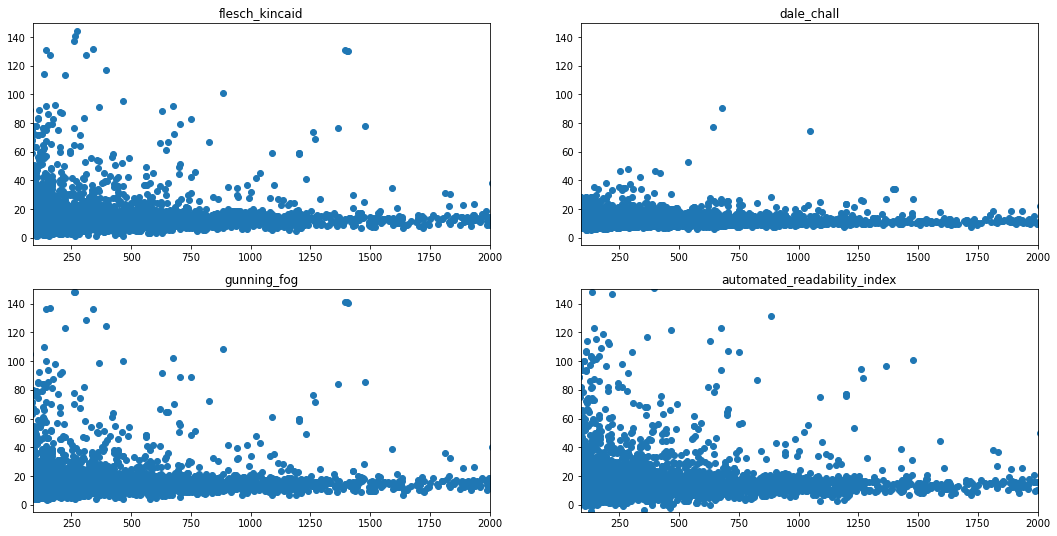

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(18, 9))
axes[0, 0].scatter(train_imbalanced_style['num_words'], train_imbalanced_style['flesch_kincaid'])
axes[0, 0].set_title('flesch_kincaid')
axes[0, 1].scatter(train_imbalanced_style['num_words'], train_imbalanced_style['dale_chall'])
axes[0, 1].set_title('dale_chall')
axes[1, 0].scatter(train_imbalanced_style['num_words'], train_imbalanced_style['gunning_fog'])
axes[1, 0].set_title('gunning_fog')
axes[1, 1].scatter(train_imbalanced_style['num_words'], train_imbalanced_style['automated_readability_index'])
axes[1, 1].set_title('automated_readability_index')
plt.setp(axes, xlim=(90, 2000), ylim=(-5, 150))
plt.show()

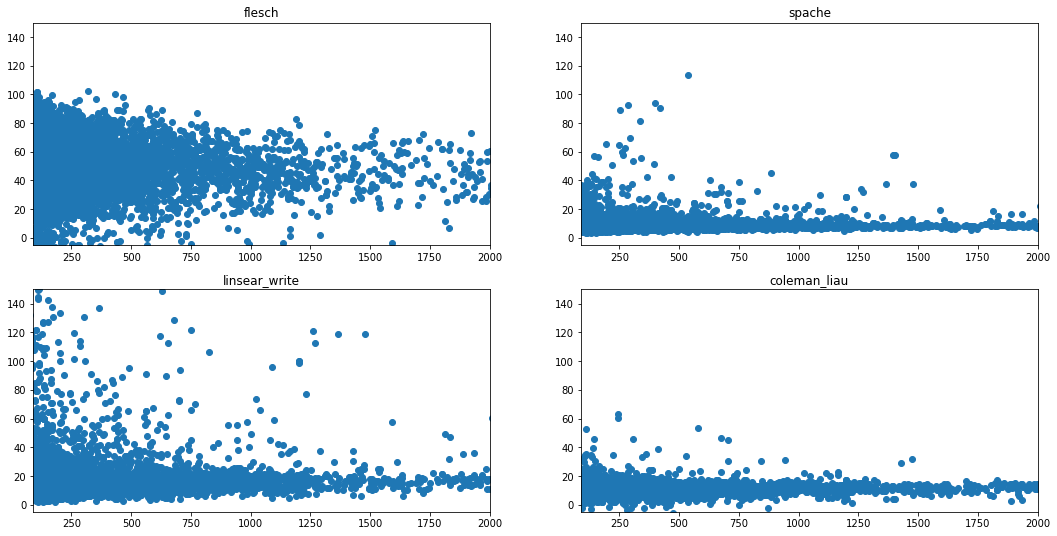

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(18, 9))
axes[0, 0].scatter(train_imbalanced_style['num_words'], train_imbalanced_style['flesch'])
axes[0, 0].set_title('flesch')
axes[0, 1].scatter(train_imbalanced_style['num_words'], train_imbalanced_style['spache'])
axes[0, 1].set_title('spache')
axes[1, 0].scatter(train_imbalanced_style['num_words'], train_imbalanced_style['linsear_write'])
axes[1, 0].set_title('linsear_write')
axes[1, 1].scatter(train_imbalanced_style['num_words'], train_imbalanced_style['coleman_liau'])
axes[1, 1].set_title('coleman_liau')
plt.setp(axes, xlim=(90, 2000), ylim=(-5, 150))
plt.show()

Thus, the mean value of the training set will be used to replace the missing values.

In [39]:
train_balanced_style, test_balanced_style = impute_missing(train_balanced_style, test_balanced_style, strategy='mean')
train_imbalanced_style, test_imbalanced_style = impute_missing(train_imbalanced_style, test_imbalanced_style, strategy='mean')

## Change Column Names

For consistency, change the id and class column names:

In [40]:
train_balanced_style = train_balanced_style.rename(columns={"id": "email_id", "class": "email_class"})
test_balanced_style = test_balanced_style.rename(columns={"id": "email_id", "class": "email_class"})

train_imbalanced_style = train_imbalanced_style.rename(columns={"id": "email_id", "class": "email_class"})
test_imbalanced_sgtyle = test_imbalanced_style.rename(columns={"id": "email_id", "class": "email_class"})

## Saving Results

In [41]:
save_to_csv(train_balanced_style, csv_path, 'style_train_balanced.csv')
save_to_csv(test_balanced_style, csv_path, 'style_test_balanced.csv')

save_to_csv(train_imbalanced_style, csv_path, 'style_train_imbalanced.csv')
save_to_csv(test_imbalanced_style, csv_path, 'style_test_imbalanced.csv')

Saving to /home/ichanis/projects/phishing_public/data/csv/style_train_balanced.csv
Saving to /home/ichanis/projects/phishing_public/data/csv/style_test_balanced.csv
Saving to /home/ichanis/projects/phishing_public/data/csv/style_train_imbalanced.csv
Saving to /home/ichanis/projects/phishing_public/data/csv/style_test_imbalanced.csv
